In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List

In [2]:
results = pd.read_csv("generated_results.csv")
results.head()

,title,description,input_text,target_query,model,generated_output,rouge1,rouge2,rougeL,rougeLsum
0,Scale Sports Adjustable Quad Roller Skates for...,Adjustable Roller Skates are a great choice fo...,Scale Sports Adjustable Quad Roller Skates for...,Adjustable roller skates for kids,T5-product2query-finetune-v1,Adjustable Quad Roller Skates,66.67,28.57,66.67,66.67
1,Scale Sports Adjustable Quad Roller Skates for...,Adjustable Roller Skates are a great choice fo...,Scale Sports Adjustable Quad Roller Skates for...,Adjustable roller skates for kids,query-gen-msmarco-t5-base-v1,what size are quad skates,20.00,0.00,20.00,20.00
2,Shimaly Women's Short Length Petticoat Above K...,How to select the size?\nPlease select the siz...,Shimaly Women's Short Length Petticoat Above K...,Shimaly Women's Petticoat,T5-product2query-finetune-v1,Shimaly Women's Petticoat,100.00,100.00,100.00,100.00
3,Shimaly Women's Short Length Petticoat Above K...,How to select the size?\nPlease select the siz...,Shimaly Women's Short Length Petticoat Above K...,Shimaly Women's Petticoat,query-gen-msmarco-t5-base-v1,what is the length of a petticoat,18.18,0.00,18.18,18.18
4,Gopune Men's Summer Lightweight Breathable Cas...,Mens Hiking Summer Pants\nMain Features:\nMate...,Gopune Men's Summer Lightweight Breathable Cas...,Men's Quick Dry Hiking Pants,T5-product2query-finetune-v1,Gopune Men's Hiking Pants,72.73,44.44,72.73,72.73


In [3]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             1000 non-null   object 
 1   description       1000 non-null   object 
 2   input_text        1000 non-null   object 
 3   target_query      1000 non-null   object 
 4   model             1000 non-null   object 
 5   generated_output  1000 non-null   object 
 6   rouge1            1000 non-null   float64
 7   rouge2            1000 non-null   float64
 8   rougeL            1000 non-null   float64
 9   rougeLsum         1000 non-null   float64
dtypes: float64(4), object(6)
memory usage: 78.2+ KB


In [9]:
first_model = results["model"].unique()[0]
second_model = results["model"].unique()[1]

print("First model:", first_model, "\nSecond model:", second_model)

First model: T5-product2query-finetune-v1 
Second model: query-gen-msmarco-t5-base-v1


In [10]:
def plot_quick_comparison(data: pd.DataFrame, score_columns: List[str], fine_tuned_model_name: str, original_model_name: str) -> None:
    """
    Density plot of ROUGE scores of provided models.

    Parameters:
        data (DataFrame): The dataset containing ROUGE scores.
        score_columns (List[str]): List of column names for ROUGE scores.
        fine_tuned_model_name (str): Name of the fine-tuned model
        original_model_name (str): Name of the model used for training

    Returns:
        None: Displays the plots.
    """
    # Filter data for each model
    fine_tuned_data = data[data['model'] == fine_tuned_model_name]
    original_data = data[data['model'] == original_model_name]

    # Set up the overall style and aesthetics
    sns.set_theme(style="whitegrid")

    plt.figure(figsize=(18, 12))
    
    # Iterate over each ROUGE score column to create a subplot
    for i, score in enumerate(score_columns, 1):
        plt.subplot(2, 2, i)
        sns.kdeplot(fine_tuned_data[score], fill=True, color='blue', alpha=0.5, label='Fine-Tuned Model', linewidth=2)
        sns.kdeplot(original_data[score], fill=True, color='orange', alpha=0.5, label='Original Model', linewidth=2)
        plt.title(f'Distribution of {score}', fontsize=14, fontweight='bold')
        plt.xlabel(f'{score} (%)', fontsize=12)
        plt.ylabel('Density', fontsize=12)
        plt.legend(fontsize=10, title="Model", title_fontsize=12, loc='upper right')
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.suptitle('Comparison of ROUGE Score Distributions', fontsize=16, fontweight='bold', y=1.02)
    plt.show()


In [11]:
def plot_detailed_comparison(data: pd.DataFrame, score_columns: List[str], fine_tuned_model_name: str, original_model_name: str) -> None:
    """
    Plots the histogram of ROUGE scores of provided models.

    Parameters:
        data (DataFrame): The dataset containing ROUGE scores.
        score_columns (List[str]): List of column names for ROUGE scores.
        fine_tuned_model_name (str): Name of the fine-tuned model
        original_model_name (str): Name of the model used for training

    Returns:
        None: Displays the plots.
    """
    # Filter data for each model
    fine_tuned_data = data[data['model'] == fine_tuned_model_name]
    original_data = data[data['model'] == original_model_name]

    plt.figure(figsize=(15, 20))
    
    # Iterate over each ROUGE score column to create subplots for both models
    for i, score in enumerate(score_columns, 1):
        plt.subplot(4, 2, 2 * i - 1)
        sns.histplot(fine_tuned_data[score], kde=True, bins=20, color='blue', edgecolor='black')
        plt.title(f'Distribution of {score} for {fine_tuned_model_name}')
        plt.xlabel(f'{score} (%)')
        plt.ylabel('Frequency')

        plt.subplot(4, 2, 2 * i)
        sns.histplot(original_data[score], kde=True, bins=20, color='orange', edgecolor='black')
        plt.title(f'Distribution of {score} for {original_model_name}')
        plt.xlabel(f'{score} (%)')
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

In [13]:
score_columns = ['rouge1', 'rouge2', 'rougeL', 'rougeLsum']

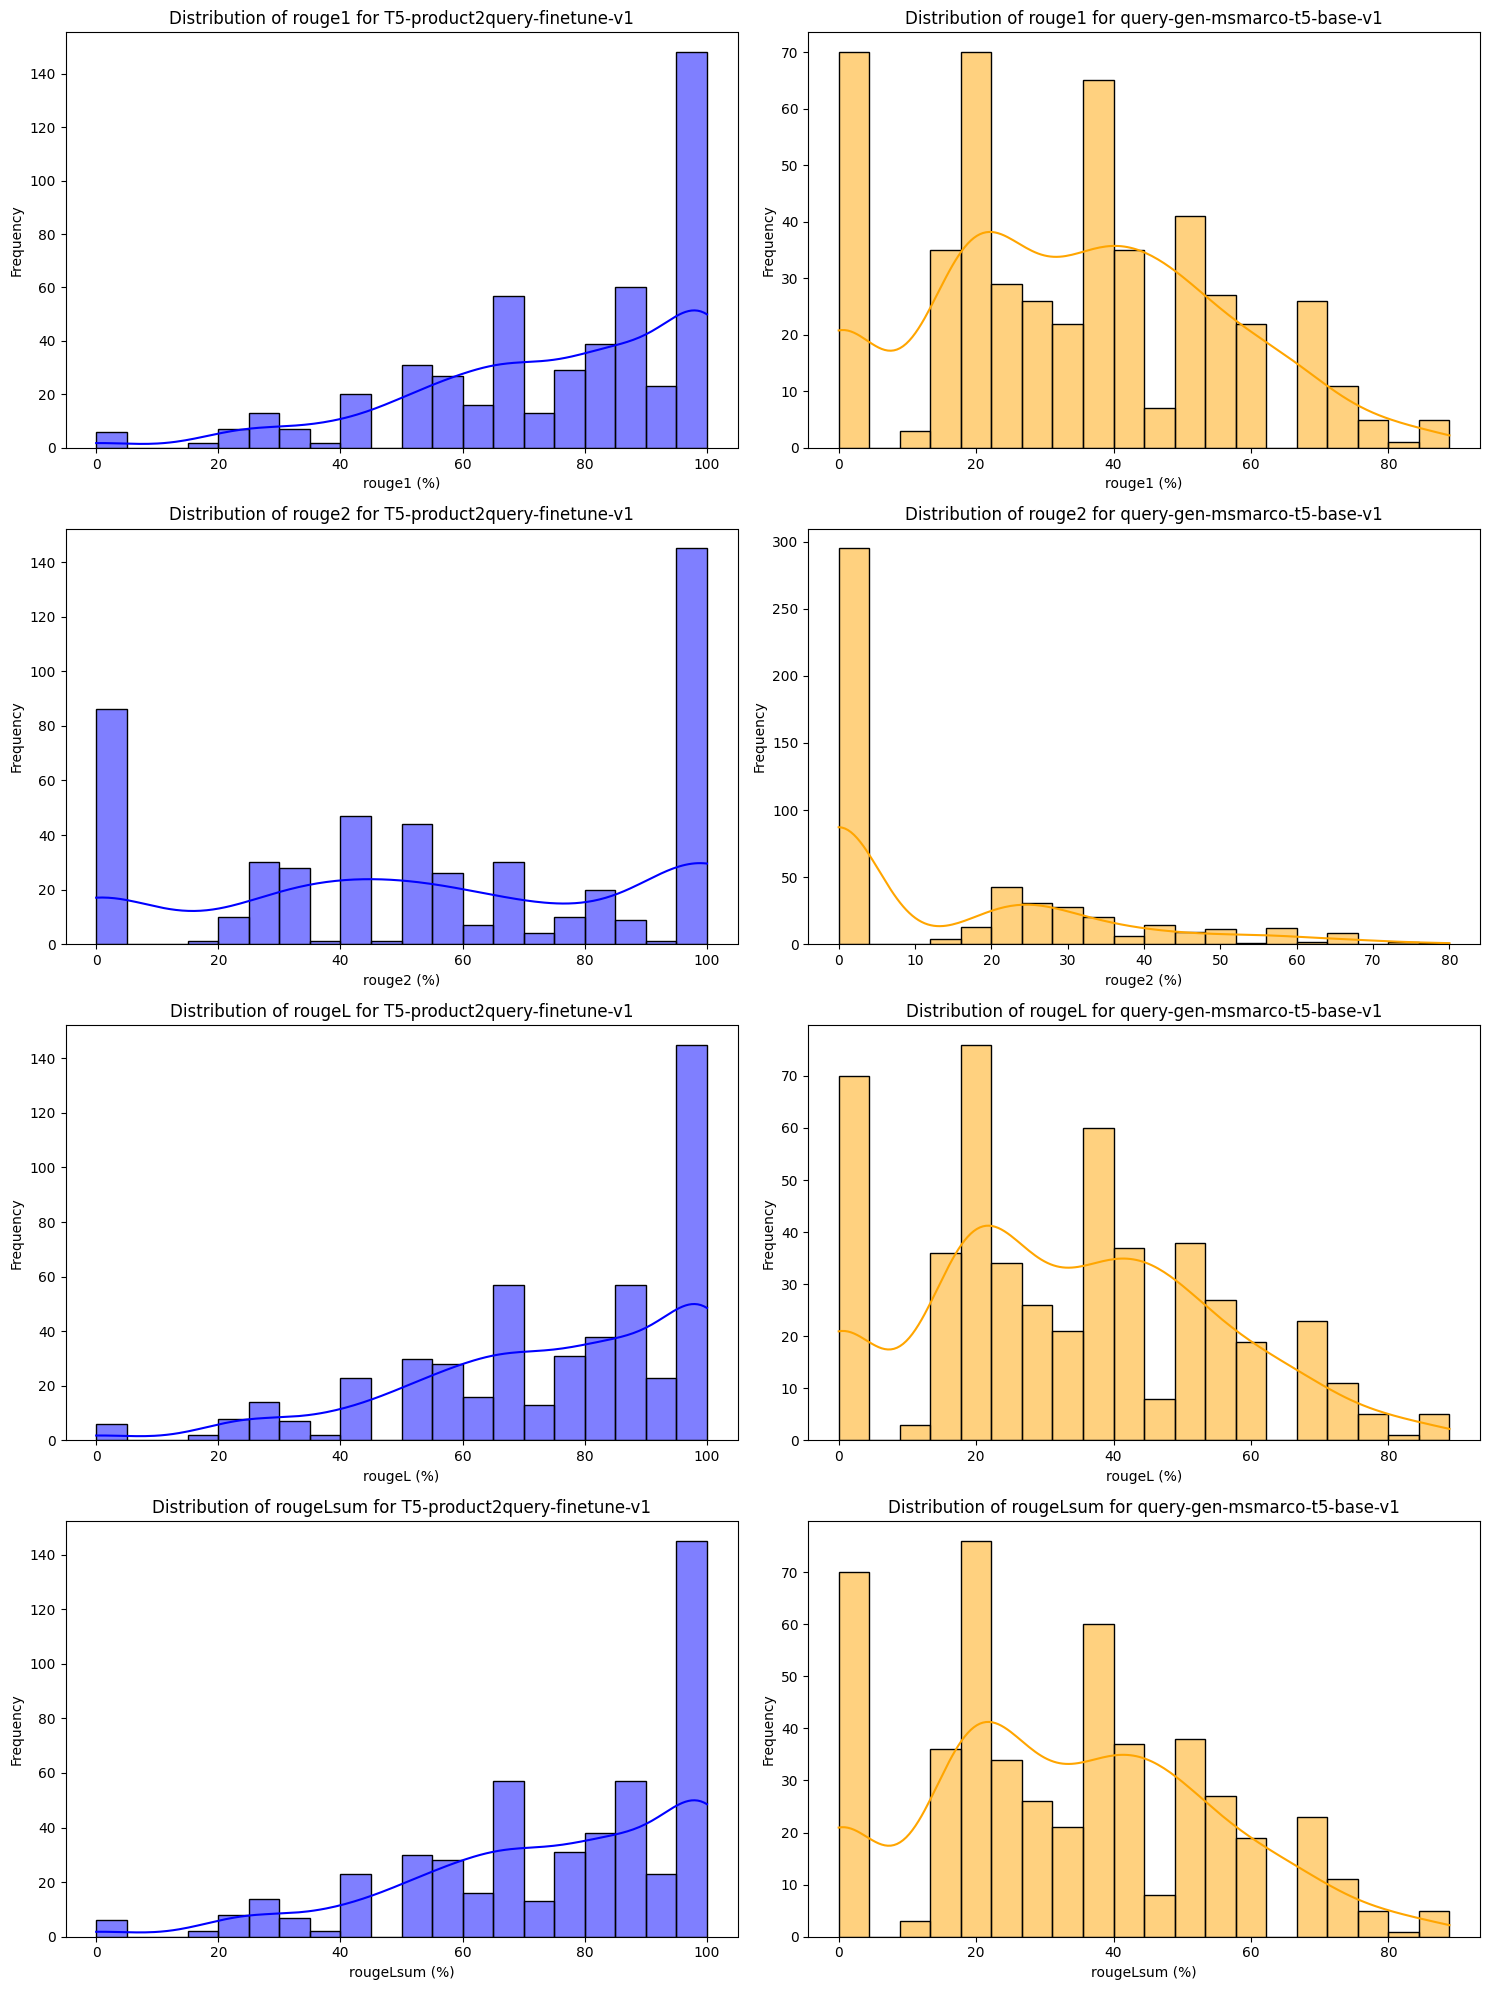

In [14]:
plot_detailed_comparison(results, score_columns, first_model, second_model)

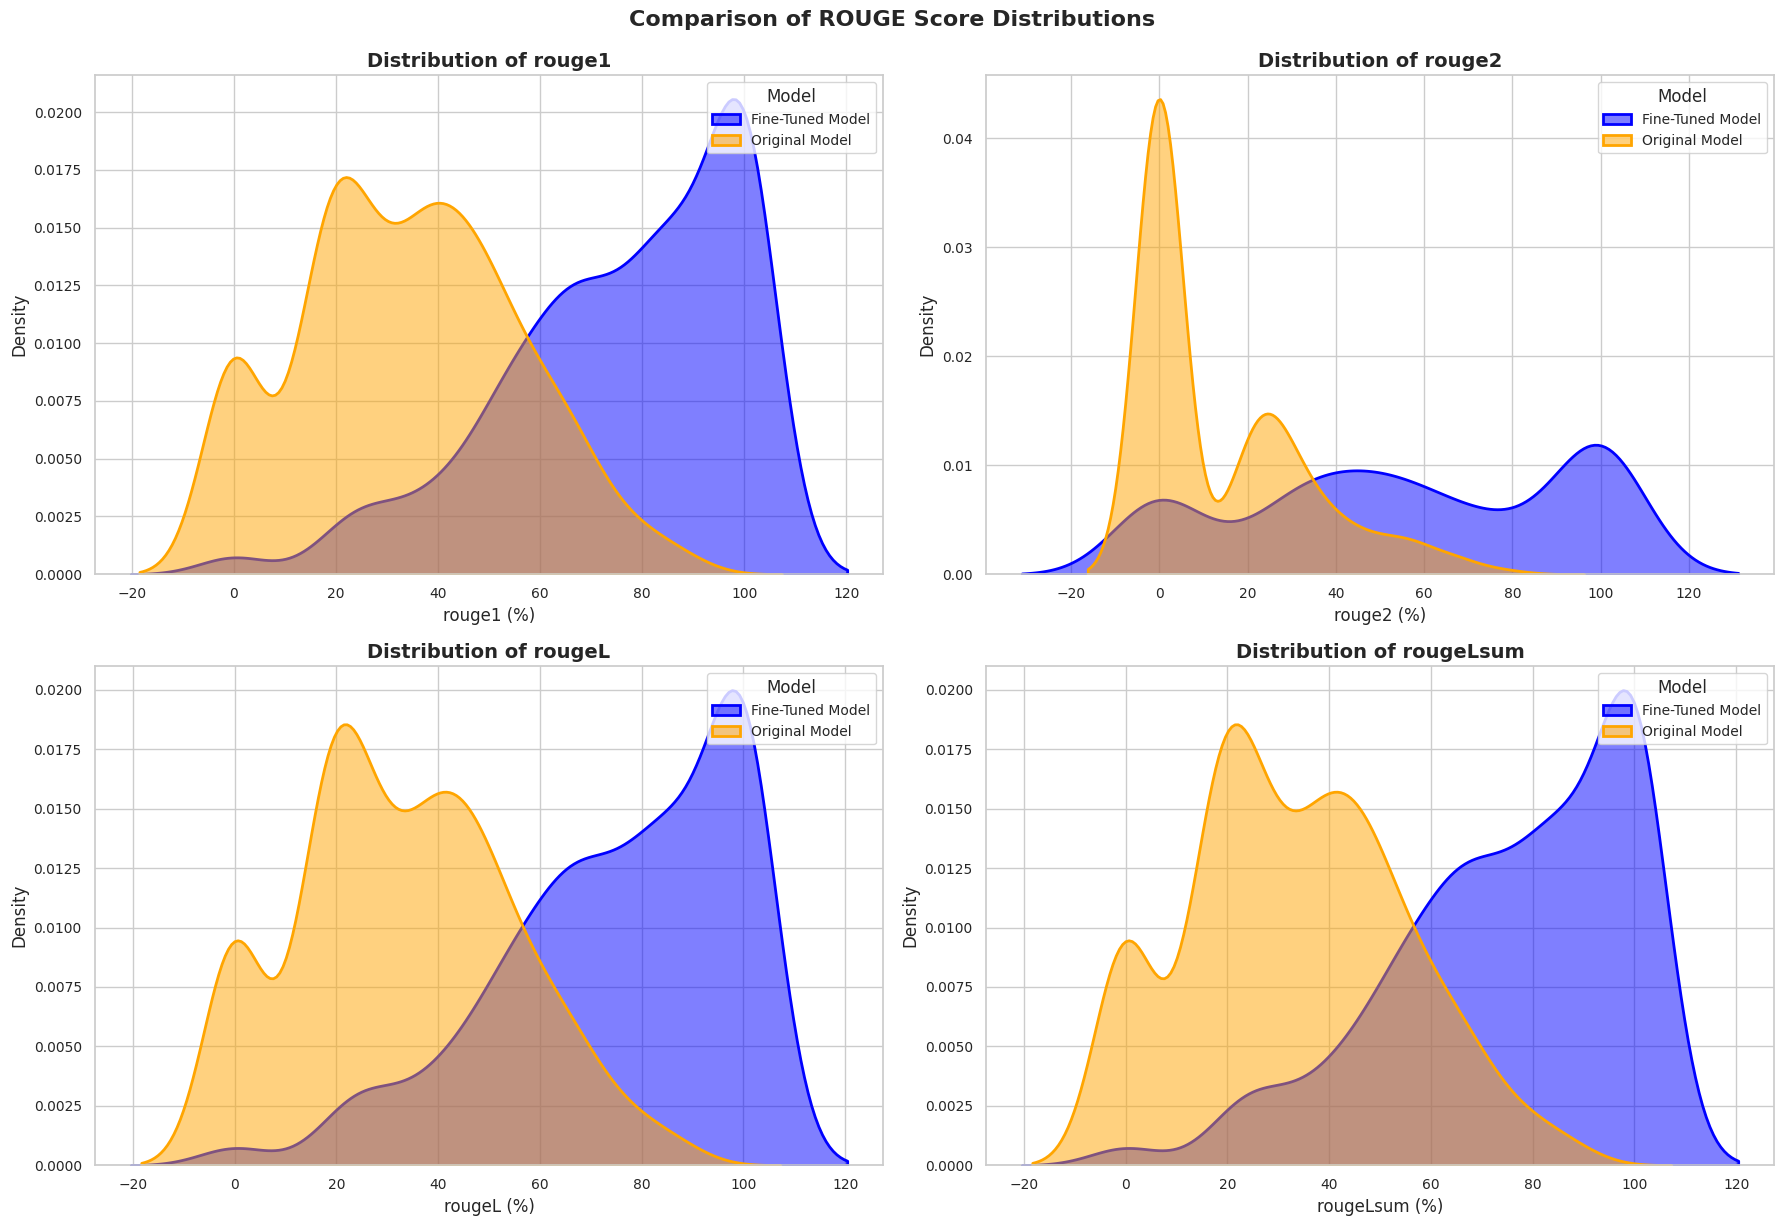

In [15]:
plot_quick_comparison(results, score_columns, first_model, second_model)

In [16]:
def get_results_for_zero_scores(data: pd.DataFrame, model_name: str, save: bool = False, display_head: bool = False) -> pd.DataFrame:

    zero_scores_df = data[(data['rouge1'] == 0) & (data['rouge2'] == 0) & (data['rougeLsum'] == 0) & (data['rougeL'] == 0) & (data['model'] == model_name)]

    if save:
        zero_scores_df.to_csv("zeros.csv")

    if display_head:
        zero_scores_df.head()

    return zero_scores_df

In [20]:
def get_outperformed_results(data: pd.DataFrame, first_model: str, second_model: str, save: bool = False, display_head: bool = False) -> pd.DataFrame:
    df_1 = data[data['model'] == first_model]
    df_2 = data[data['model'] == second_model]

    merged_df = pd.merge(df_1[['description', 'target_query', 'generated_output', 'rouge1', 'rouge2', 'rougeL','rougeLsum']],
                     df_2[['description', 'target_query', 'generated_output', 'rouge1', 'rouge2', 'rougeL','rougeLsum']],
                     on='description',
                     suffixes=(f'_{first_model}', f'_{second_model}'))
    
    better_results = merged_df[
    (merged_df[f'rouge1_{first_model}'] > merged_df[f'rouge1_{second_model}']) &
    (merged_df[f'rouge2_{first_model}'] > merged_df[f'rouge2_{second_model}']) &
    (merged_df[f'rougeL_{first_model}'] > merged_df[f'rougeL_{second_model}']) &
    (merged_df[f'rougeLsum_{first_model}'] > merged_df[f'rougeLsum_{second_model}'])
    ]

    filtered_df = better_results[['description',  f'target_query_{second_model}', f'generated_output_{first_model}', 
                         f'generated_output_{second_model}',
                         ]]
    if save:
        filtered_df.to_csv(f"better_{first_model}.csv")

    if display_head:
        filtered_df.head()

    return filtered_df

In [18]:
def get_best_results(data: pd.DataFrame, score: float, model_name: str, save: bool = False, display_head: bool = False) -> pd.DataFrame:

    best = data[(data['rougeL'] >= score) & (data['model'] == model_name)]

    if save:
        best.to_csv("best50.csv")

    if display_head:
        best.head()

    return best

In [25]:
def get_worst_results(data: pd.DataFrame, model_name: str, score: float = 0, save: bool = False, display_head: bool = False) -> pd.DataFrame:

    worst = data[(data['rougeL'] <= score) & (data['model'] == model_name)]

    if save:
        worst.to_csv("worst50.csv")

    if display_head:
        worst.head()

    return worst

In [22]:
get_outperformed_results(results, second_model, first_model, display_head=True)

,description,target_query_T5-product2query-finetune-v1,generated_output_query-gen-msmarco-t5-base-v1,generated_output_T5-product2query-finetune-v1
15,Slip into comfort after an intense training se...,Under Armour Men's Playmaker Slide Sandals,under armour playmaker slide sandals,Under Armour Playmaker III Slide Sandals
26,Be an instant showstopper in the Sassy One-Sho...,Zumba Sassy One Shoulder Top,what is the sassy one shoulder top,Zumba women's reversible top
27,Give yourself a stylish cut or use this Wahl H...,Wahl Combo Pro Styling Kit,what is the wahl combo pro kit,Wahl Hair Clipper 79450
42,Form meets function on the brand new TaylorMad...,TaylorMade Pro Cart 8.0 golf bag,what is taylormade pro cart,TaylorMade Tm20cart8.0bag
54,Princess Dress Costumes for Little Girls Dress...,princess dress costume,what is princess dress,toddler girls mermaid dress
92,An Amazon brand - This modern non-iron chino d...,non-iron chino pant,what is chino pant,Buttoned Down Men's Chino Pant
98,Aprilsky Natural Hexagonal Prism Healing Point...,Healing Crystal Necklace,aprilsky healing point crystal necklace,healing point necklace
160,An Amazon brand - This weekend-perfect casual ...,amazon essentials shirt dress,what is amazon essentials,women's long-sleeve shirt dress
201,Enjoy the warm coziness of fleece but not the ...,Silky fleece sleep pants,who makes silky fleece sleep pants,Van Heusen fleece pajama pants
223,The SHANY All-in-One Makeup Kit Eye Shadow Pal...,SHANY All-in-One Makeup Kit,what is in the shany makeup kit,SHANY makeup set


In [23]:
get_results_for_zero_scores(results, first_model, display_head=True)

,title,description,input_text,target_query,model,generated_output,rouge1,rouge2,rougeL,rougeLsum
166,LEYUNIQ 16G Labret Studs Tragus Conch Earrings...,Product color: SilverProduct type: body pierci...,LEYUNIQ 16G Labret Studs Tragus Conch Earrings...,gold body piercing jewelry,T5-product2query-finetune-v1,LEYUNIQ Labret Studs,0.0,0.0,0.0,0.0
264,Morphsuits mens Morphmask Original,Get you morphsuit on. They're perfect for part...,Morphsuits mens Morphmask Original\n\nGet you ...,orange morphmask costume,T5-product2query-finetune-v1,men's lycra morphsuit,0.0,0.0,0.0,0.0
418,Libobo_women Pullover Christmas Cowl Collar Sn...,"❤Welcome to Cup coverH , may you have a pleasa...",Libobo_women Pullover Christmas Cowl Collar Sn...,blue snowman print pullover,T5-product2query-finetune-v1,Libobo Women's Christmas Top,0.0,0.0,0.0,0.0
514,Mongous Mens Cotton Patch Brimless Skullcap Sa...,Mongous Classic Solid Color Patch Print Brimle...,Mongous Mens Cotton Patch Brimless Skullcap Sa...,brimless cap,T5-product2query-finetune-v1,Mongous Men's Skullcap,0.0,0.0,0.0,0.0
542,Leg Avenue Women's 2 Pc Floral Mesh Bralette a...,Whether it’s feeling glamorous and sultry in o...,Leg Avenue Women's 2 Pc Floral Mesh Bralette a...,Leg Avenue lingerie,T5-product2query-finetune-v1,Floral Mesh Bralette and Skirt Set,0.0,0.0,0.0,0.0
872,Fashion Headbands from BeSportWise,Do you think Great Style and Comfort don’t mat...,Fashion Headbands from BeSportWise\n\nDo you t...,fashion headbands,T5-product2query-finetune-v1,BeSportWise Headband,0.0,0.0,0.0,0.0


In [24]:
get_best_results(data = results, score = 50, model_name = first_model, display_head=True)

,title,description,input_text,target_query,model,generated_output,rouge1,rouge2,rougeL,rougeLsum
0,Scale Sports Adjustable Quad Roller Skates for...,Adjustable Roller Skates are a great choice fo...,Scale Sports Adjustable Quad Roller Skates for...,Adjustable roller skates for kids,T5-product2query-finetune-v1,Adjustable Quad Roller Skates,66.67,28.57,66.67,66.67
2,Shimaly Women's Short Length Petticoat Above K...,How to select the size?\nPlease select the siz...,Shimaly Women's Short Length Petticoat Above K...,Shimaly Women's Petticoat,T5-product2query-finetune-v1,Shimaly Women's Petticoat,100.00,100.00,100.00,100.00
4,Gopune Men's Summer Lightweight Breathable Cas...,Mens Hiking Summer Pants\nMain Features:\nMate...,Gopune Men's Summer Lightweight Breathable Cas...,Men's Quick Dry Hiking Pants,T5-product2query-finetune-v1,Gopune Men's Hiking Pants,72.73,44.44,72.73,72.73
6,Womens Yoga Tops Sexy Backless Yoga Shirt Open...,"Material\n---70% Modal, 30% Polyester. Breatha...",Womens Yoga Tops Sexy Backless Yoga Shirt Open...,women's backless yoga top,T5-product2query-finetune-v1,Women's Backless Yoga Top,100.00,100.00,100.00,100.00
8,Stainless Steel Hoop Earrings 4 Pairs Small Ho...,♥Graceful Jewelry Give Your Unique Looks♥\n♥pr...,Stainless Steel Hoop Earrings 4 Pairs Small Ho...,stainless steel hoop earrings,T5-product2query-finetune-v1,stainless steel hoop earrings,100.00,100.00,100.00,100.00
...,...,...,...,...,...,...,...,...,...,...
986,WUSHIMAOYI Vintage Globe Bracelet Planet Earth...,★ You will receive this exclusive piece of Jew...,WUSHIMAOYI Vintage Globe Bracelet Planet Earth...,Vintage Globe Bracelet,T5-product2query-finetune-v1,vintage globe bracelet,100.00,100.00,100.00,100.00
988,Chaco Men's Zcloud Athletic Sandal,Want your classic sandals with pillow-top comf...,Chaco Men's Zcloud Athletic Sandal\n\nWant you...,Chaco Zcloud Sandal,T5-product2query-finetune-v1,Chaco Men's Zcloud Athletic Sandal,66.67,0.00,66.67,66.67
990,Cattier Organic White Clay Face Scrub With Alo...,Cattier Organic Face Scrub White Clay is a gen...,Cattier Organic White Clay Face Scrub With Alo...,Cattier Organic Face Scrub,T5-product2query-finetune-v1,Cattier Organic White Clay Face Scrub,80.00,50.00,80.00,80.00
994,Nine West Women's Cayenne Leather Dress Pump,Nine West offers a quick edit of the runways -...,Nine West Women's Cayenne Leather Dress Pump\n...,Nine West Cayenne Dress Pump,T5-product2query-finetune-v1,Nine West Cayenne Leather Dress Pump,90.91,66.67,90.91,90.91


In [26]:
get_worst_results(data=results, model_name=first_model, display_head=True)

,title,description,input_text,target_query,model,generated_output,rouge1,rouge2,rougeL,rougeLsum
166,LEYUNIQ 16G Labret Studs Tragus Conch Earrings...,Product color: SilverProduct type: body pierci...,LEYUNIQ 16G Labret Studs Tragus Conch Earrings...,gold body piercing jewelry,T5-product2query-finetune-v1,LEYUNIQ Labret Studs,0.0,0.0,0.0,0.0
264,Morphsuits mens Morphmask Original,Get you morphsuit on. They're perfect for part...,Morphsuits mens Morphmask Original\n\nGet you ...,orange morphmask costume,T5-product2query-finetune-v1,men's lycra morphsuit,0.0,0.0,0.0,0.0
418,Libobo_women Pullover Christmas Cowl Collar Sn...,"❤Welcome to Cup coverH , may you have a pleasa...",Libobo_women Pullover Christmas Cowl Collar Sn...,blue snowman print pullover,T5-product2query-finetune-v1,Libobo Women's Christmas Top,0.0,0.0,0.0,0.0
514,Mongous Mens Cotton Patch Brimless Skullcap Sa...,Mongous Classic Solid Color Patch Print Brimle...,Mongous Mens Cotton Patch Brimless Skullcap Sa...,brimless cap,T5-product2query-finetune-v1,Mongous Men's Skullcap,0.0,0.0,0.0,0.0
542,Leg Avenue Women's 2 Pc Floral Mesh Bralette a...,Whether it’s feeling glamorous and sultry in o...,Leg Avenue Women's 2 Pc Floral Mesh Bralette a...,Leg Avenue lingerie,T5-product2query-finetune-v1,Floral Mesh Bralette and Skirt Set,0.0,0.0,0.0,0.0
872,Fashion Headbands from BeSportWise,Do you think Great Style and Comfort don’t mat...,Fashion Headbands from BeSportWise\n\nDo you t...,fashion headbands,T5-product2query-finetune-v1,BeSportWise Headband,0.0,0.0,0.0,0.0
